<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Обзор" data-toc-modified-id="Обзор-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор</a></span><ul class="toc-item"><li><span><a href="#Состав-по-миссиям" data-toc-modified-id="Состав-по-миссиям-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Состав по миссиям</a></span></li><li><span><a href="#Pairplot" data-toc-modified-id="Pairplot-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pairplot</a></span></li></ul></li><li><span><a href="#Корр.-матрица,-ненормированная" data-toc-modified-id="Корр.-матрица,-ненормированная-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Корр. матрица, ненормированная</a></span><ul class="toc-item"><li><span><a href="#По-всем-миссиям" data-toc-modified-id="По-всем-миссиям-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>По всем миссиям</a></span></li><li><span><a href="#По-типу-грунта" data-toc-modified-id="По-типу-грунта-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>По типу грунта</a></span><ul class="toc-item"><li><span><a href="#Море" data-toc-modified-id="Море-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Море</a></span></li><li><span><a href="#Горы" data-toc-modified-id="Горы-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Горы</a></span></li></ul></li></ul></li><li><span><a href="#Нормализация-данных" data-toc-modified-id="Нормализация-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Нормализация данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Понижения-размерности" data-toc-modified-id="Понижения-размерности-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Понижения размерности</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#TSNE" data-toc-modified-id="TSNE-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>TSNE</a></span></li><li><span><a href="#MDS" data-toc-modified-id="MDS-6.0.2"><span class="toc-item-num">6.0.2&nbsp;&nbsp;</span>MDS</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Ответ-BomBarDir" data-toc-modified-id="Ответ-BomBarDir-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ответ BomBarDir</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import print_function
from __future__ import division
import pandas as pd
import numpy as np
import scipy.stats as stats
from StringIO import StringIO
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, FileLink, Image
from sklearn.preprocessing import scale

from utils import (load_df, transpose_df, plot_and_save_corr, pairplot, plot_representation, plot_mds,
                   regplot_perason, test_diff)

In [2]:
from IPython.display import Image

# Загрузка данных

Данные берем из сообщения pmg
https://glav.su/forum/1/682/messages/4744116/#message4744116

In [3]:
data_s = unicode("""
Минерал	Л16	Л20	Л24	A11	A12	A14	A15	A16	A17
	Море	Горы	Море	Море	Море	Горы	Море	Горы	Море
SiO2	41,7	44,2	43,3	41,9	45,9	47,2	47,07	45,17	40,37
Al2O3	15,33	22,9	15,2	13,55	12,5	17,2	14,17	26,71	11,6
TiO2	3,39	0,56	1,13	7,56	2,81	1,79	1,75	0,59	8,99
FeO	16,64	7,03	16,3	15,94	16,4	10,40	14,92	5,57	17,01
MgO	8,78	9,7	8,69	7,82	10	9,37	10,44	6,03	9,79
CaO	12,49	15,2	13,1	12,08	10,40	11	8,95	15,61	10,98
Na2O	0,34	0,55	0,42	0,4	0,41	0,66	0,39	0,44	0,32
K2O	0,1	0,1	0,04	0,13	0,25	0,58	0,2	0,12	0,08
MnO	0,21	0,12	0,22	0,21	0,22	0,14	0,18	0,08	0,23
""", encoding='utf8')



Загужаем данные преобразовывая ориентацию транспонируем) и обозначая столбцы миссии (mission) и типа области (type):

In [4]:
df = load_df(data_s)
df

,mission,type,SiO2,Al2O3,TiO2,FeO,MgO,CaO,Na2O,K2O,MnO
1,Л16,Море,41.70,15.33,3.39,16.64,8.78,12.49,0.34,0.10,0.21
2,Л20,Горы,44.20,22.90,0.56,7.03,9.70,15.20,0.55,0.10,0.12
3,Л24,Море,43.30,15.20,1.13,16.30,8.69,13.10,0.42,0.04,0.22
4,A11,Море,41.90,13.55,7.56,15.94,7.82,12.08,0.40,0.13,0.21
5,A12,Море,45.90,12.50,2.81,16.40,10.00,10.40,0.41,0.25,0.22
6,A14,Горы,47.20,17.20,1.79,10.40,9.37,11.00,0.66,0.58,0.14
7,A15,Море,47.07,14.17,1.75,14.92,10.44,8.95,0.39,0.20,0.18
8,A16,Горы,45.17,26.71,0.59,5.57,6.03,15.61,0.44,0.12,0.08
9,A17,Море,40.37,11.60,8.99,17.01,9.79,10.98,0.32,0.08,0.23


Список минералов

In [5]:
minerals = df.columns[2:]
print(list(minerals))

[u'SiO2', u'Al2O3', u'TiO2', u'FeO', u'MgO', u'CaO', u'Na2O', u'K2O', u'MnO']


Транспонированное представление понадобиться в дальнейшем

In [6]:
df2  = transpose_df(df)
df2

,Л16,Л20,Л24,A11,A12,A14,A15,A16,A17
SiO2,41.70,44.20,43.30,41.90,45.90,47.20,47.07,45.17,40.37
Al2O3,15.33,22.90,15.20,13.55,12.50,17.20,14.17,26.71,11.60
TiO2,3.39,0.56,1.13,7.56,2.81,1.79,1.75,0.59,8.99
FeO,16.64,7.03,16.30,15.94,16.40,10.40,14.92,5.57,17.01
MgO,8.78,9.70,8.69,7.82,10.00,9.37,10.44,6.03,9.79
CaO,12.49,15.20,13.10,12.08,10.40,11.00,8.95,15.61,10.98
Na2O,0.34,0.55,0.42,0.40,0.41,0.66,0.39,0.44,0.32
K2O,0.10,0.10,0.04,0.13,0.25,0.58,0.20,0.12,0.08
MnO,0.21,0.12,0.22,0.21,0.22,0.14,0.18,0.08,0.23


Представление как список

In [7]:
dfs = df2.stack().reset_index()
dfs.columns = ['mineral', 'mission', 'percent']
def fill_type(row):
    return df[df.mission==row.mission].iloc[0].type
dfs['type'] = dfs.apply(fill_type, axis=1)
dfs.head(15)

,mineral,mission,percent,type
0,SiO2,Л16,41.70,Море
1,SiO2,Л20,44.20,Горы
2,SiO2,Л24,43.30,Море
3,SiO2,A11,41.90,Море
4,SiO2,A12,45.90,Море
5,SiO2,A14,47.20,Горы
6,SiO2,A15,47.07,Море
7,SiO2,A16,45.17,Горы
8,SiO2,A17,40.37,Море
9,Al2O3,Л16,15.33,Море


# Обзор

## Состав по миссиям

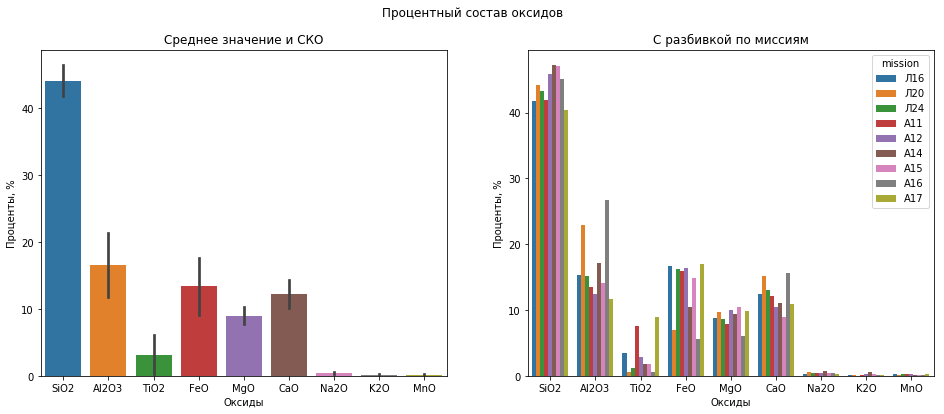

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

ax = axes[0]
#sns.barplot(data=df, ax=ax, ci='sd')
sns.barplot(y='percent', x='mineral', data=dfs, ax=ax, ci='sd')
ax.set_ylabel(u'Проценты, %')
ax.set_xlabel(u'Оксиды')
ax.set_title(u'Среднее значение и СКО')

ax = axes[1]
sns.barplot(y='percent', x='mineral', hue='mission', data=dfs, ax=ax)
ax.set_ylabel(u'Проценты, %')
ax.set_xlabel(u'Оксиды')
ax.set_title(u'С разбивкой по миссиям')

fig.suptitle(u'Процентный состав оксидов')
fig.savefig('mc_barplot.png')

Разбивка по типу (Суша или море)

https://en.wikipedia.org/wiki/Violin_plot


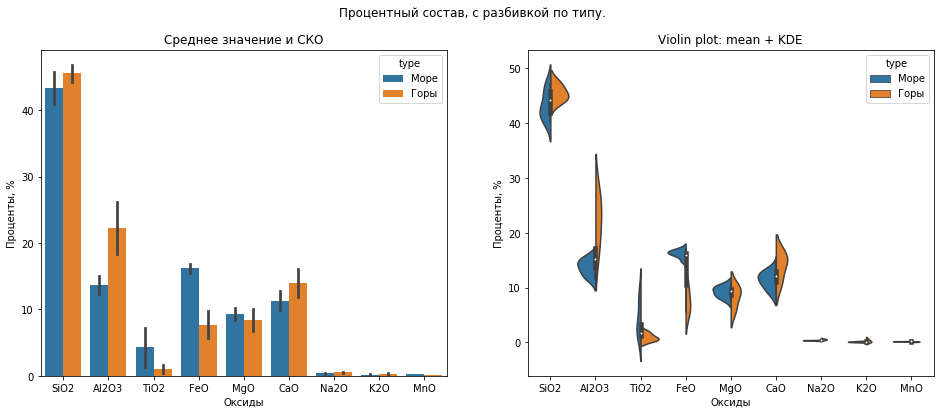

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

ax = axes[0]
sns.barplot(y='percent', x='mineral', hue='type', data=dfs, ax=ax, ci='sd')
ax.set_ylabel(u'Проценты, %')
ax.set_xlabel(u'Оксиды')
ax.set_title(u'Среднее значение и СКО')


ax = axes[1]
sns.violinplot(y='percent', x='mineral', hue='type', data=dfs, ax=ax, ci='sd', split=True)
ax.set_title(u'Violin plot: mean + KDE')
ax.set_xlabel(u'Оксиды')
ax.set_ylabel(u'Проценты, %')

fig.suptitle(u'Процентный состав, с разбивкой по типу.')
fig.savefig('mc_barplot_2.png')

Для оксидов с малым содержанием

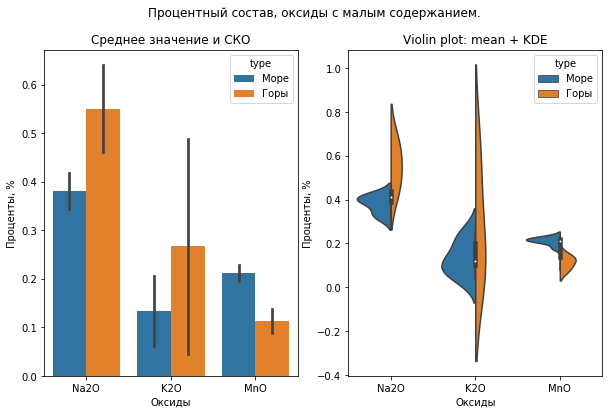

In [10]:
dfs2 = dfs[dfs.mineral.isin(['Na2O', 'K2O', 'MnO'])]

fig, axes = plt.subplots(ncols=2, figsize=(10, 6))

ax = axes[0]
sns.barplot(y='percent', x='mineral', hue='type', data=dfs2, ax=ax, ci='sd')
ax.set_ylabel(u'Проценты, %')
ax.set_xlabel(u'Оксиды')
ax.set_title(u'Среднее значение и СКО')


ax = axes[1]
sns.violinplot(y='percent', x='mineral', hue='type', data=dfs2, ax=ax, ci='sd', split=True)
ax.set_title(u'Violin plot: mean + KDE')
ax.set_xlabel(u'Оксиды')
ax.set_ylabel(u'Проценты, %')

fig.suptitle(u'Процентный состав, оксиды с малым содержанием.')
fig.savefig('mc_barplot_3.png')

In [11]:
#df[minerals].hist(figsize=(20, 20), bins=30)
#pass

## Pairplot

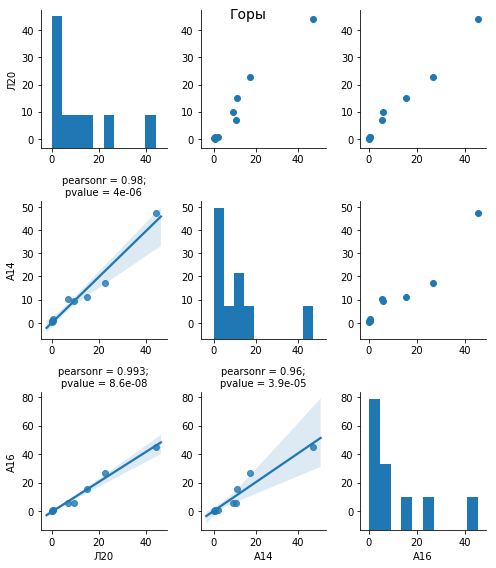

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_pair_plot_continent.png

In [12]:
df2  = transpose_df(df, u'Горы')
pairplot(df2, title=u'Горы', save=True, fn_postfix='continent', figsize=(7, 8))

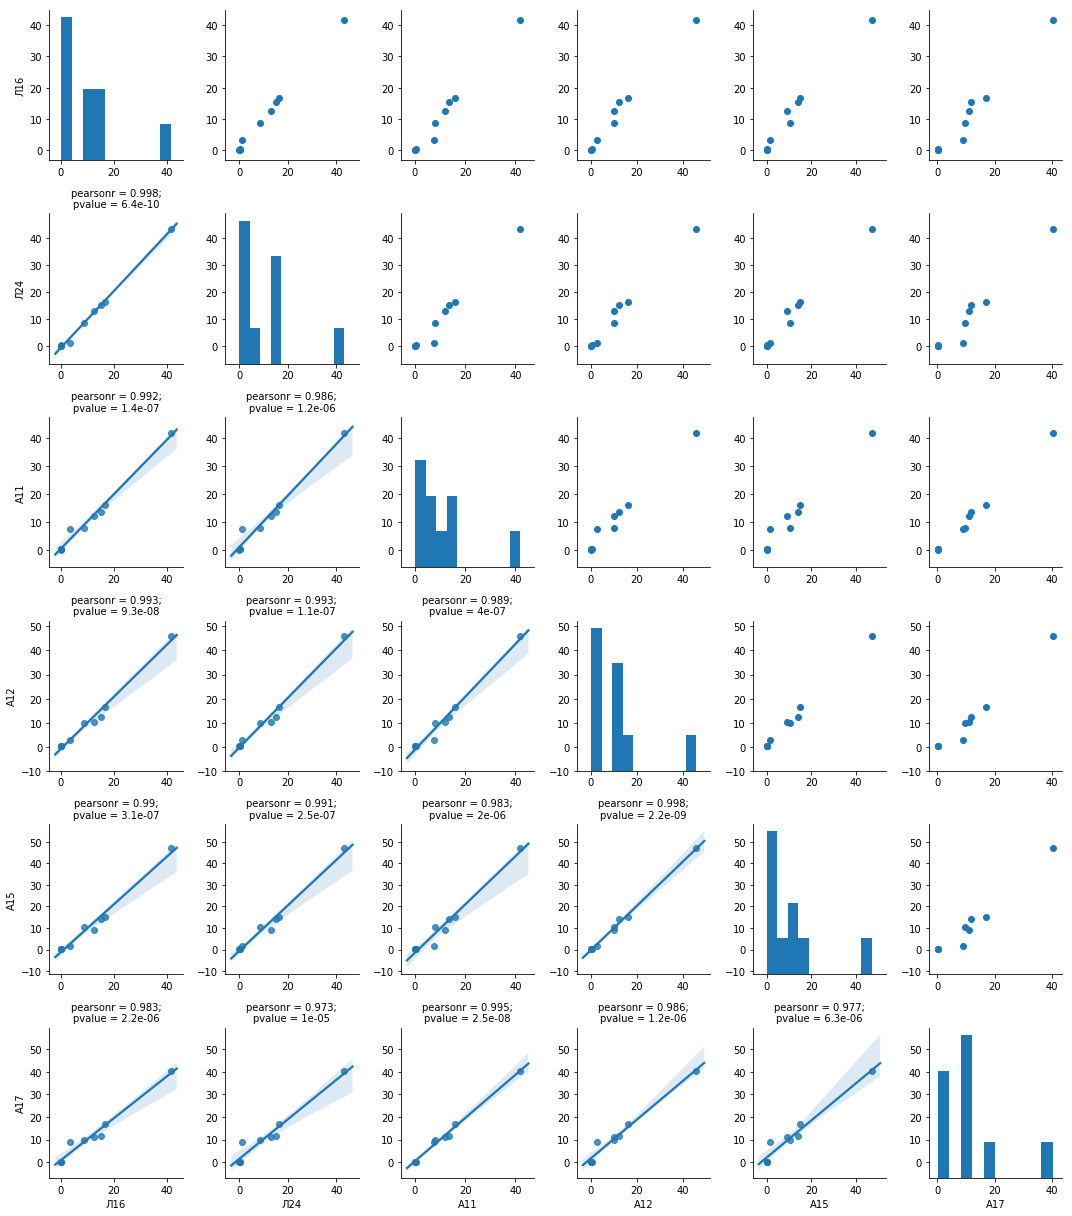

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_pair_plot_mare.png

In [13]:
df2  = transpose_df(df, u'Море')
pairplot(df2, title=u'', save=True, fn_postfix='mare', figsize=(15, 17))

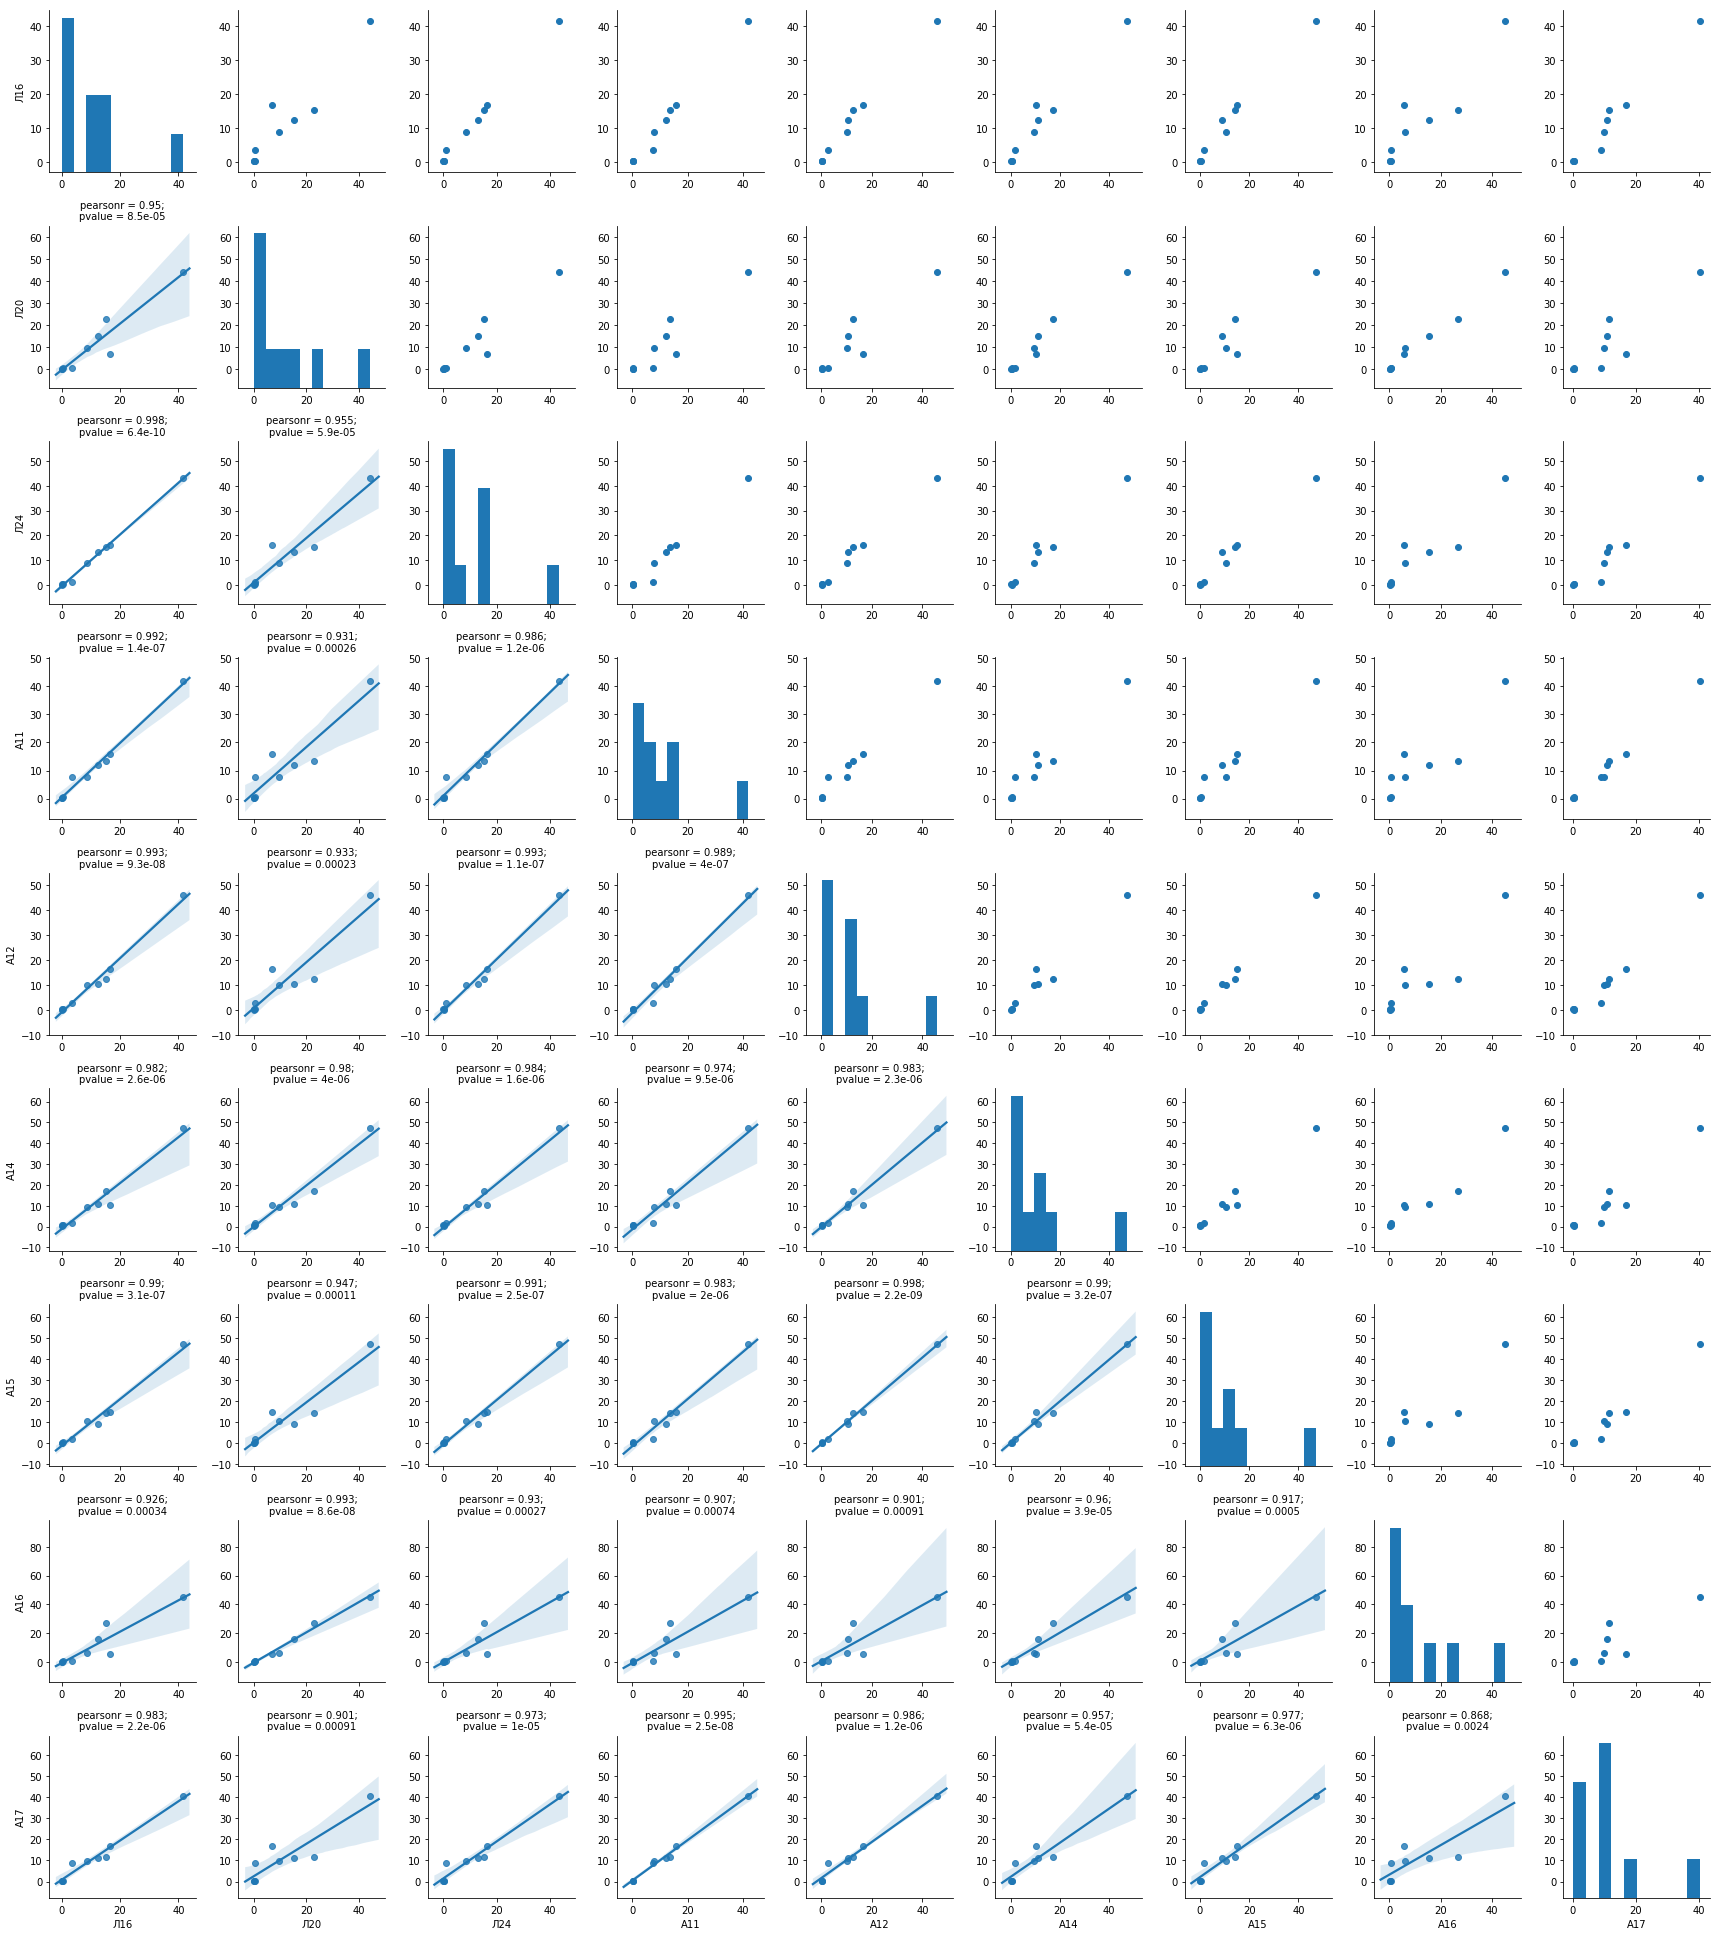

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_pair_plot_all.png

In [14]:
df2  = transpose_df(df)
pairplot(df2, title=u'', save=True, fn_postfix='all', figsize=(24, 27))

# Корр. матрица, ненормированная

(не номированные данные)

## По всем миссиям

,Л16,Л20,Л24,A11,A12,A14,A15,A16,A17
Л16,1.000000,0.950427,0.998320,0.992157,0.993025,0.981850,0.990154,0.925907,0.982663
Л20,0.950427,1.000000,0.955424,0.931168,0.933410,0.979534,0.946502,0.993178,0.901005
Л24,0.998320,0.955424,1.000000,0.985604,0.992585,0.984278,0.990712,0.930486,0.973298
A11,0.992157,0.931168,0.985604,1.000000,0.989390,0.973701,0.983295,0.906988,0.995230
A12,0.993025,0.933410,0.992585,0.989390,1.000000,0.982505,0.997602,0.901021,0.985565
A14,0.981850,0.979534,0.984278,0.973701,0.982505,1.000000,0.990042,0.960316,0.956510
A15,0.990154,0.946502,0.990712,0.983295,0.997602,0.990042,1.000000,0.916793,0.976650
A16,0.925907,0.993178,0.930486,0.906988,0.901021,0.960316,0.916793,1.000000,0.868058
A17,0.982663,0.901005,0.973298,0.995230,0.985565,0.956510,0.976650,0.868058,1.000000


/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_pearson_all.csv

Минимальное значение: 0.8681


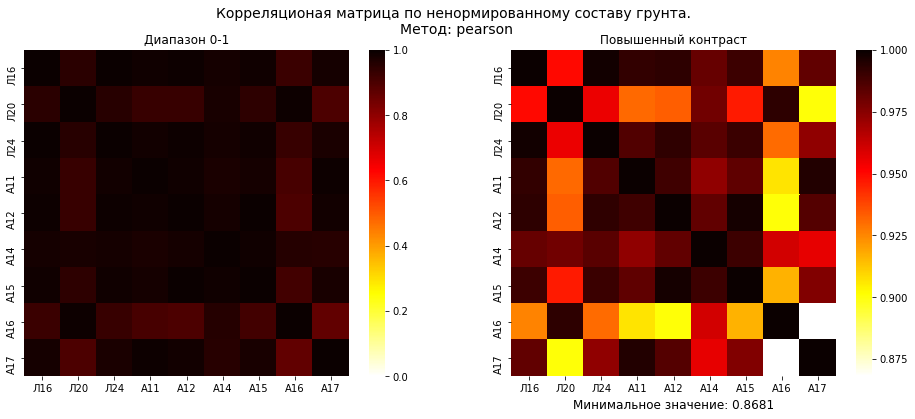

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_pearson_all.png

In [15]:
df2 = transpose_df(df)

plot_and_save_corr(df2, scale=False)

Другие методы корреляции

,Л16,Л20,Л24,A11,A12,A14,A15,A16,A17
Л16,1.000000,0.900000,1.000000,1.000000,0.983333,0.933333,0.966667,0.883333,1.000000
Л20,0.900000,1.000000,0.900000,0.900000,0.883333,0.966667,0.866667,0.983333,0.900000
Л24,1.000000,0.900000,1.000000,1.000000,0.983333,0.933333,0.966667,0.883333,1.000000
A11,1.000000,0.900000,1.000000,1.000000,0.983333,0.933333,0.966667,0.883333,1.000000
A12,0.983333,0.883333,0.983333,0.983333,1.000000,0.950000,0.983333,0.900000,0.983333
A14,0.933333,0.966667,0.933333,0.933333,0.950000,1.000000,0.916667,0.983333,0.933333
A15,0.966667,0.866667,0.966667,0.966667,0.983333,0.916667,1.000000,0.883333,0.966667
A16,0.883333,0.983333,0.883333,0.883333,0.900000,0.983333,0.883333,1.000000,0.883333
A17,1.000000,0.900000,1.000000,1.000000,0.983333,0.933333,0.966667,0.883333,1.000000


/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_spearman_all.csv

Минимальное значение: 0.8667


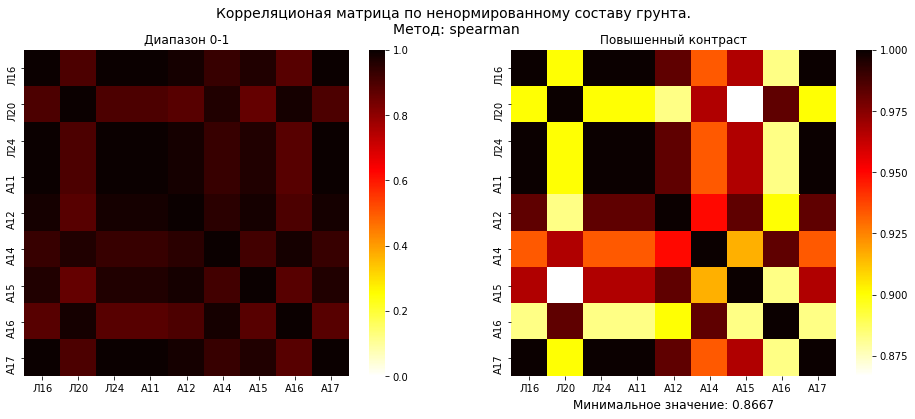

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_spearman_all.png

In [16]:
plot_and_save_corr(df2, method='spearman')

,Л16,Л20,Л24,A11,A12,A14,A15,A16,A17
Л16,1.000000,0.833333,1.000000,1.000000,0.944444,0.833333,0.888889,0.777778,1.000000
Л20,0.833333,1.000000,0.833333,0.833333,0.777778,0.888889,0.722222,0.944444,0.833333
Л24,1.000000,0.833333,1.000000,1.000000,0.944444,0.833333,0.888889,0.777778,1.000000
A11,1.000000,0.833333,1.000000,1.000000,0.944444,0.833333,0.888889,0.777778,1.000000
A12,0.944444,0.777778,0.944444,0.944444,1.000000,0.888889,0.944444,0.833333,0.944444
A14,0.833333,0.888889,0.833333,0.833333,0.888889,1.000000,0.833333,0.944444,0.833333
A15,0.888889,0.722222,0.888889,0.888889,0.944444,0.833333,1.000000,0.777778,0.888889
A16,0.777778,0.944444,0.777778,0.777778,0.833333,0.944444,0.777778,1.000000,0.777778
A17,1.000000,0.833333,1.000000,1.000000,0.944444,0.833333,0.888889,0.777778,1.000000


/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_kendall_all.csv

Минимальное значение: 0.7222


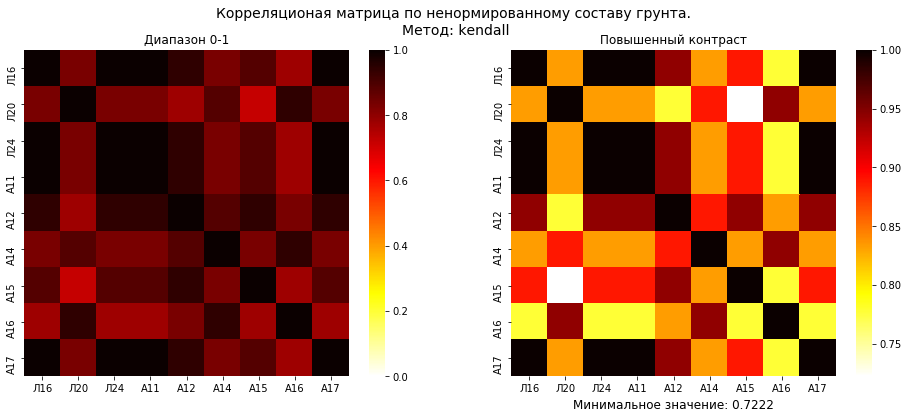

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_kendall_all.png

In [17]:
plot_and_save_corr(df2, method='kendall')

## По типу грунта

### Море

In [18]:
df2 = transpose_df(df, u'Море')
df2

,Л16,Л24,A11,A12,A15,A17
SiO2,41.70,43.30,41.90,45.90,47.07,40.37
Al2O3,15.33,15.20,13.55,12.50,14.17,11.60
TiO2,3.39,1.13,7.56,2.81,1.75,8.99
FeO,16.64,16.30,15.94,16.40,14.92,17.01
MgO,8.78,8.69,7.82,10.00,10.44,9.79
CaO,12.49,13.10,12.08,10.40,8.95,10.98
Na2O,0.34,0.42,0.40,0.41,0.39,0.32
K2O,0.10,0.04,0.13,0.25,0.20,0.08
MnO,0.21,0.22,0.21,0.22,0.18,0.23


,Л16,Л24,A11,A12,A15,A17
Л16,1.000000,0.998320,0.992157,0.993025,0.990154,0.982663
Л24,0.998320,1.000000,0.985604,0.992585,0.990712,0.973298
A11,0.992157,0.985604,1.000000,0.989390,0.983295,0.995230
A12,0.993025,0.992585,0.989390,1.000000,0.997602,0.985565
A15,0.990154,0.990712,0.983295,0.997602,1.000000,0.976650
A17,0.982663,0.973298,0.995230,0.985565,0.976650,1.000000


/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_pearson_mare.csv

Минимальное значение: 0.9733


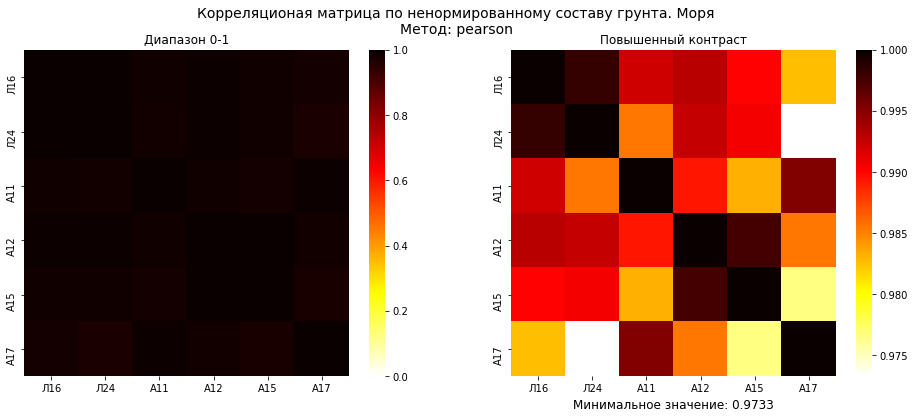

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_pearson_mare.png

In [19]:
plot_and_save_corr(df2, title_postfix=u'Моря', fn_postfix='mare')

### Горы

In [20]:
df2 = transpose_df(df, u'Горы')
df2

,Л20,A14,A16
SiO2,44.20,47.20,45.17
Al2O3,22.90,17.20,26.71
TiO2,0.56,1.79,0.59
FeO,7.03,10.40,5.57
MgO,9.70,9.37,6.03
CaO,15.20,11.00,15.61
Na2O,0.55,0.66,0.44
K2O,0.10,0.58,0.12
MnO,0.12,0.14,0.08


,Л20,A14,A16
Л20,1.000000,0.979534,0.993178
A14,0.979534,1.000000,0.960316
A16,0.993178,0.960316,1.000000


/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_pearson_continent.csv

Минимальное значение: 0.9603


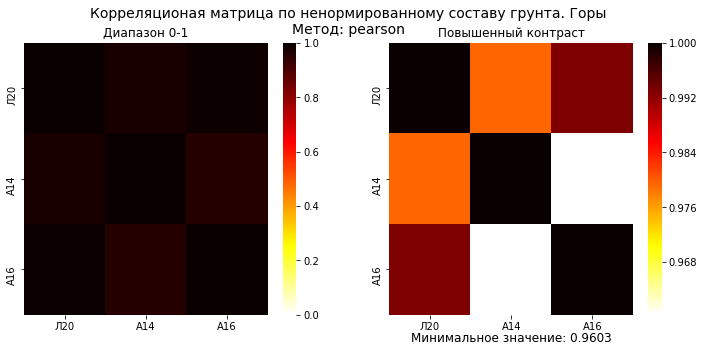

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_pearson_continent.png

In [21]:
plot_and_save_corr(df2, title_postfix=u'Горы', fn_postfix='continent', figsize=(12, 5))

# Нормализация данных

,Л20,A14,A16
Л20,1.000000,-0.602927,0.056753
A14,-0.602927,1.000000,-0.830729
A16,0.056753,-0.830729,1.000000


/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_pearson_all_slaced.csv

Минимальное значение: 0.05675


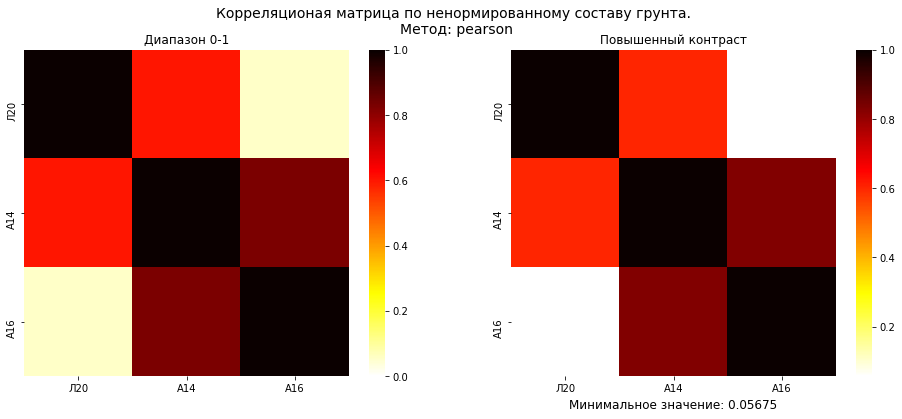

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_corr_pearson_all_slaced.png

In [22]:
plot_and_save_corr(df2, scale=True)

Кореляционую матрицу проводить бесмысленно (почему, ниже, выводы, если коротко не сравниваюь разнородных данных, сравнивают выборки)

In [23]:
df_scaled = pd.DataFrame(scale(df[minerals]), columns=minerals, index=df.index)
df_other = df[[col for col in df.columns if col not in minerals]]
df_scaled = pd.concat([df_other, df_scaled], axis=1)
df_scaled

,mission,type,SiO2,Al2O3,TiO2,FeO,MgO,CaO,Na2O,K2O,MnO
1,Л16,Море,-1.035140,-0.261894,0.074734,0.777326,-0.139264,0.140100,-0.965594,-0.504682,0.619627
2,Л20,Горы,0.047642,1.332640,-0.906437,-1.497832,0.581426,1.454342,1.132076,-0.504682,-1.172865
3,Л24,Море,-0.342159,-0.289277,-0.708816,0.696831,-0.209766,0.435926,-0.166482,-0.894009,0.818792
4,A11,Море,-0.948517,-0.636831,1.520487,0.611602,-0.891287,-0.058734,-0.366260,-0.310019,0.619627
5,A12,Море,0.783934,-0.858001,-0.126354,0.720506,0.816433,-0.873468,-0.266371,0.468634,0.818792
6,A14,Горы,1.346981,0.132000,-0.479991,-0.699988,0.322917,-0.582491,2.230856,2.609929,-0.774533
7,A15,Море,1.290676,-0.506235,-0.493860,0.370118,1.161110,-1.576660,-0.466149,0.144195,0.022130
8,A16,Горы,0.467762,2.135174,-0.896035,-1.843486,-2.293497,1.653176,0.033296,-0.374907,-1.969528
9,A17,Море,-1.611180,-1.047576,2.016272,0.864923,0.651928,-0.592191,-1.165373,-0.634458,1.017958


Коэффициент корреляции Пирсона: 0.950427446888
p value: 8.50672635706e-05


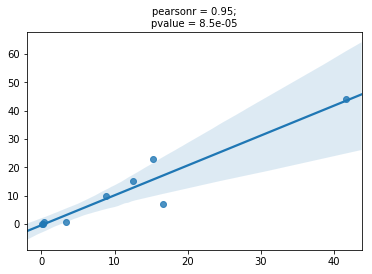

In [24]:
a = df[df.mission==u'Л16']
b = df[df.mission==u'Л20']
x = a[minerals].values[0]
y = b[minerals].values[0]

coeff, pvalue = stats.pearsonr(x, y)
print(u"Коэффициент корреляции Пирсона: {}".format(coeff))
print(u"p value: {}".format(pvalue))

regplot_perason(x, y)
plt.savefig('1.png')
pass

In [25]:
a = df_scaled[df_scaled.mission==u'Л16']
b = df_scaled[df_scaled.mission==u'Л20']
a

,mission,type,SiO2,Al2O3,TiO2,FeO,MgO,CaO,Na2O,K2O,MnO
1,Л16,Море,-1.03514,-0.261894,0.074734,0.777326,-0.139264,0.1401,-0.965594,-0.504682,0.619627


In [26]:
b

,mission,type,SiO2,Al2O3,TiO2,FeO,MgO,CaO,Na2O,K2O,MnO
2,Л20,Горы,0.047642,1.33264,-0.906437,-1.497832,0.581426,1.454342,1.132076,-0.504682,-1.172865


Коэффициент корреляции Пирсона: -0.528681723434
p value: 0.143366786764


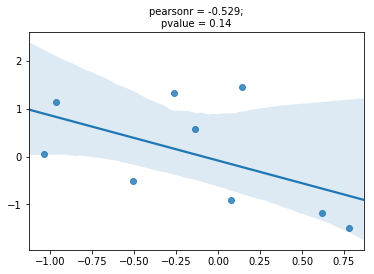

In [27]:
x = a[minerals].values[0]
y = b[minerals].values[0]

coeff, pvalue = stats.pearsonr(x, y)
print(u"Коэффициент корреляции Пирсона: {}".format(coeff))
print(u"p value: {}".format(pvalue))

regplot_perason(x, y)
plt.savefig('1_scaled.png')
pass

# Проверка гипотез

http://baguzin.ru/wp/proverka-gipotez-dvuhvyborochnye-kri/

<img src="mc_barplot_2.png" />

In [28]:
df

,mission,type,SiO2,Al2O3,TiO2,FeO,MgO,CaO,Na2O,K2O,MnO
1,Л16,Море,41.70,15.33,3.39,16.64,8.78,12.49,0.34,0.10,0.21
2,Л20,Горы,44.20,22.90,0.56,7.03,9.70,15.20,0.55,0.10,0.12
3,Л24,Море,43.30,15.20,1.13,16.30,8.69,13.10,0.42,0.04,0.22
4,A11,Море,41.90,13.55,7.56,15.94,7.82,12.08,0.40,0.13,0.21
5,A12,Море,45.90,12.50,2.81,16.40,10.00,10.40,0.41,0.25,0.22
6,A14,Горы,47.20,17.20,1.79,10.40,9.37,11.00,0.66,0.58,0.14
7,A15,Море,47.07,14.17,1.75,14.92,10.44,8.95,0.39,0.20,0.18
8,A16,Горы,45.17,26.71,0.59,5.57,6.03,15.61,0.44,0.12,0.08
9,A17,Море,40.37,11.60,8.99,17.01,9.79,10.98,0.32,0.08,0.23


Выберем минерал, и выборки по типу суши.

In [29]:
mineral = "SiO2"

#mineral = "Al2O3"

a = df[df.type==u'Море'][mineral]
b = df[df.type==u'Горы'][mineral]


Проверим нормальное ли распределение

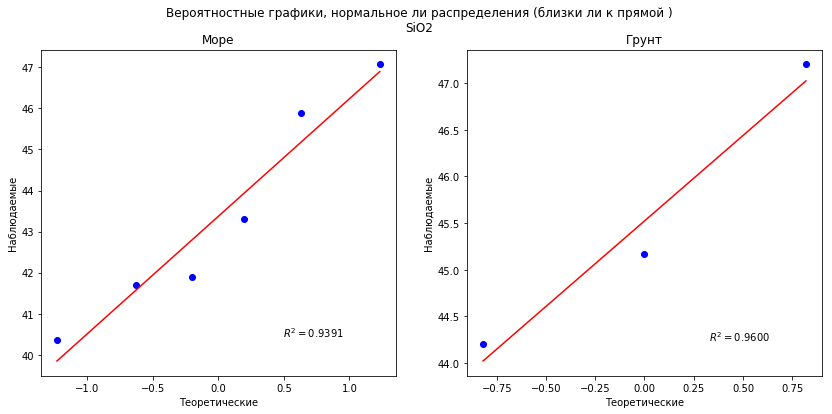

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
ax = axes[0]
stats.probplot(a, dist="norm", plot=ax, rvalue=True)
ax.set_title(u'Море')
ax.set_xlabel(u'Теоретические')
ax.set_ylabel(u'Наблюдаемые')

ax = axes[1]
stats.probplot(b, dist="norm", plot=ax, rvalue=True)
ax.set_title(u'Грунт')
ax.set_xlabel(u'Теоретические')
ax.set_ylabel(u'Наблюдаемые')


fig.suptitle(u'Вероятностные графики, нормальное ли распределения (близки ли к прямой )\n{}'.format(mineral))
fig.savefig('mc_probplot_{}.png'.format(mineral))
pass

Критерий [Шапиро-Уилка](https://en.wikipedia.org/wiki/Shapiro–Wilk_test):

 $H_0\colon$ Процентовка оксида (в выборках суша и море) распредлены нормально
 
 $H_1\colon$ не нормально.
 
 Задаем уровень 0.05

In [31]:
print("Проверка Shapiro-Wilk, W-statistic: %f, p-value: %f" % stats.shapiro(a))

Проверка Shapiro-Wilk, W-statistic: 0.924561, p-value: 0.538804


In [32]:
print("Проверка Shapiro-Wilk, W-statistic: %f, p-value: %f" % stats.shapiro(b))

Проверка Shapiro-Wilk, W-statistic: 0.960048, p-value: 0.615666


Так как p-value большое (больше 0.05) отвергаем гипотезу о нормальности.  
Критерий Стюедента применить нельзя.

Поэтому применяем непараметрический критерии ([U-критерий Манна — Уитни](https://ru.wikipedia.org/wiki/U-критерий_Манна_—_Уитни))

(В каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было два значения, но во второй тогда не менее пяти.)

In [33]:
m = stats.mannwhitneyu(a, b)
m

MannwhitneyuResult(statistic=4.0, pvalue=0.1226390584033864)

Гипотеза о том что выборки (SiO2 для гор и морей) отличаются отвергается.

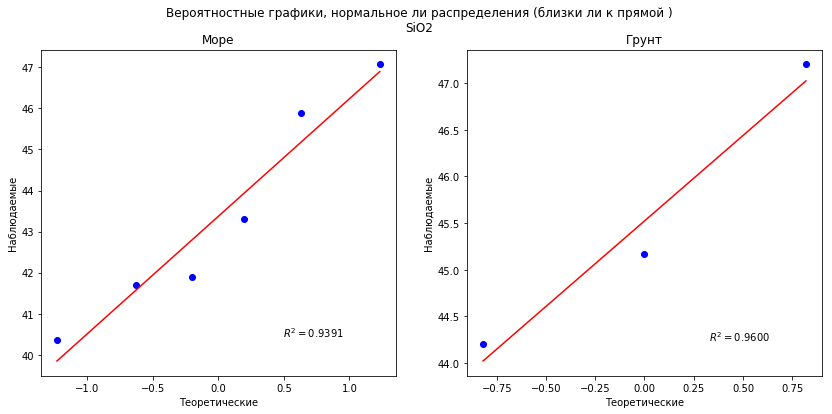

Проверка Shapiro-Wilk 'Море': W-statistic: 0.92456138134, p-value: 0.538803696632


Проверка Shapiro-Wilk 'Море': W-statistic: 0.92456138134, p-value: 0.538803696632


MannwhitneyuResult(statistic=4.0, pvalue=0.1226390584033864)


In [34]:
test_diff(df)

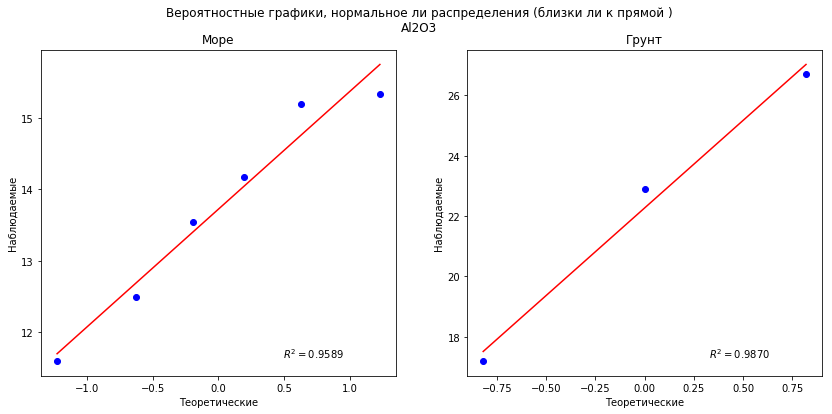

Проверка Shapiro-Wilk 'Море': W-statistic: 0.937569320202, p-value: 0.639681518078


Проверка Shapiro-Wilk 'Море': W-statistic: 0.937569320202, p-value: 0.639681518078


MannwhitneyuResult(statistic=0.0, pvalue=0.014092901073953692)


In [35]:
test_diff(df, mineral='Al2O3')

#  Понижения размерности

Визуализация с помощью понижения размерности.

Тем или иным способом, в том числе с различной метрикой "разницы" (расстояния между признаками), в том числе по корреляции

In [36]:
df

,mission,type,SiO2,Al2O3,TiO2,FeO,MgO,CaO,Na2O,K2O,MnO
1,Л16,Море,41.70,15.33,3.39,16.64,8.78,12.49,0.34,0.10,0.21
2,Л20,Горы,44.20,22.90,0.56,7.03,9.70,15.20,0.55,0.10,0.12
3,Л24,Море,43.30,15.20,1.13,16.30,8.69,13.10,0.42,0.04,0.22
4,A11,Море,41.90,13.55,7.56,15.94,7.82,12.08,0.40,0.13,0.21
5,A12,Море,45.90,12.50,2.81,16.40,10.00,10.40,0.41,0.25,0.22
6,A14,Горы,47.20,17.20,1.79,10.40,9.37,11.00,0.66,0.58,0.14
7,A15,Море,47.07,14.17,1.75,14.92,10.44,8.95,0.39,0.20,0.18
8,A16,Горы,45.17,26.71,0.59,5.57,6.03,15.61,0.44,0.12,0.08
9,A17,Море,40.37,11.60,8.99,17.01,9.79,10.98,0.32,0.08,0.23


In [37]:
X_labels = df['mission']
X_type = df['type']
selected_features = minerals
sdata = df[selected_features]

Стандартизация данных

In [38]:
X = scale(sdata)

In [39]:
X.sum(axis=0)

array([ -1.22124533e-14,  -2.22044605e-15,  -4.44089210e-16,
        -8.88178420e-16,   1.86517468e-14,   1.77635684e-15,
        -2.44249065e-15,  -8.88178420e-16,   2.44249065e-15])

### TSNE

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

https://habrahabr.ru/post/267041/



/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_tsne.png

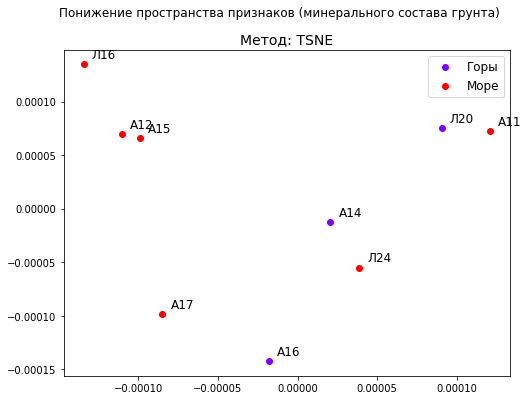

In [53]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_representation = tsne.fit_transform(X)

fig, ax = plt.subplots(figsize=(8, 6))
plot_representation(tsne_representation, title=u'Метод: TSNE', ax=ax, X_type=X_type, X_labels=X_labels)
fig.suptitle(u'Понижение пространства признаков (минерального состава грунта)')
fn = 'mc_tsne.png'
fig.savefig(fn)
display(FileLink(fn))

### MDS

In [41]:
from sklearn.manifold import MDS

mds = MDS()
MDS_transformed = mds.fit_transform(X)

/home/.virtualenvs/drivers2/local/lib/python2.7/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


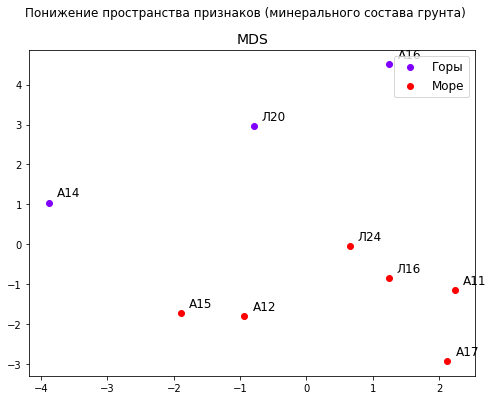

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_representation(MDS_transformed, title=u'MDS', ax=ax, X_type=X_type, X_labels=X_labels)
fig.suptitle(u'Понижение пространства признаков (минерального состава грунта)')
fig.savefig('mc_mds.png')

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_mds_cosine.png

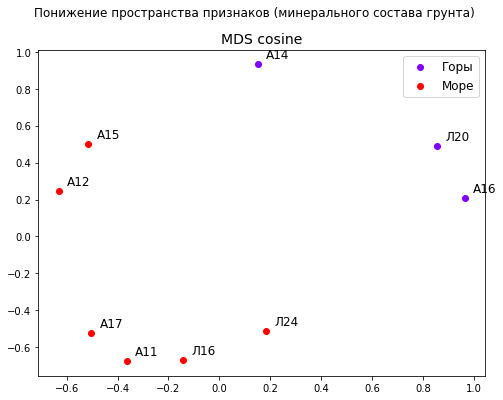

In [43]:
plot_mds(X, 'cosine', save=True, X_type=X_type, X_labels=X_labels)

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_mds_correlation.png

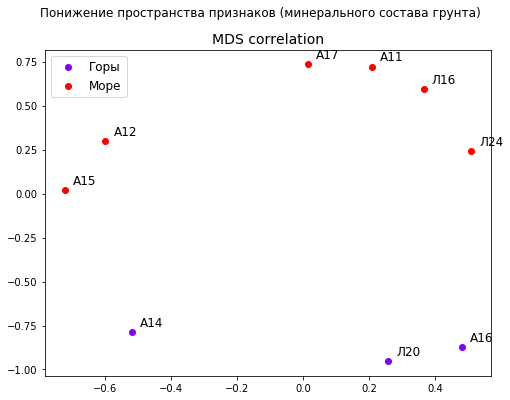

In [44]:
plot_mds(X, 'correlation', save=True, X_type=X_type, X_labels=X_labels)

/media/Data_1Tb/Themes/Apollo/_notebook/inline/statistic/mc_mds_chebyshev.png

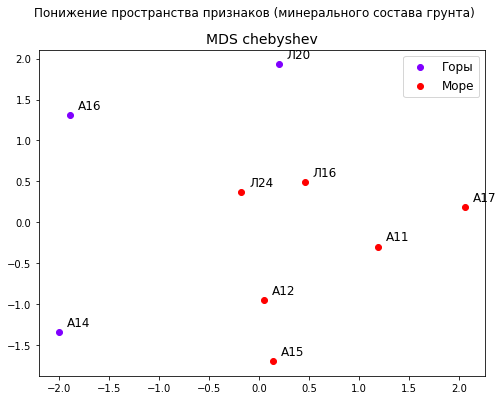

In [45]:
plot_mds(X, 'chebyshev', save=True, X_type=X_type, X_labels=X_labels)

**Кластеризация**

Кластеризацию проводить нет смысла, мало данных

**Анализ выбросов**

Нет смысла, мало данных

# Выводы

1) безумное применение корреляции было еще при оценке "совпадении" обсуждения Олейника про радиацию pmg от 12.10.2016 00:17:16
https://glav.su/forum/1-misc/682/4061972-message/#message4061972
_Цитата: Цитата
PPS коэффициент корреляции между данными вашего калькулятора и вашими 
данными лигаспэйс 0.9585... Неплохо для начала._

Человек правда не понимает, что такое корреляция и почему, например, коэффициент корреляции между измерениями:

одного ученого: 1, 2, 3  
и другого: 50, 80, 150.

будет вообще аж 0.974!

о чем ему писалось
https://glav.su/forum/1/682/messages/4062031/#message4062031

(Как и по целому спектру других вопросов при обсуждении статьи Олейника)
https://glav.su/forum/1/682/messages/4067064/#message4067064

* непонимание [задачи 3 тел](https://glav.su/forum/1-misc/682/4050134-message/#message4050134),
* неспособности [найти как вычисляются поправки влияния Луны, Солнца](https://glav.su/forum/1-misc/682/4050134-message/#message4050134),
* неспособность [оценить](https://glav.su/forum/1-misc/682/4061269-message/#message4061269) погрешности и их значимость в зависимости от точности констант (и какие [константы](https://glav.su/forum/1-misc/682/4062235-message/#message4062235) применяются),
* сравнение накопления погрешностей годового полета полета Астероида и часового взлетной траектории ("[примерно тоже самое](https://glav.su/forum/1-misc/682/4061269-message/#message4061269)"), без учета коррекции по актуальным данным.
* [разглядывание крестиков](https://glav.su/forum/1-misc/682/4062031-message/#message4062031),
* [безумного применения](https://glav.su/forum/1-misc/682/4062031-message/#message4062031) корреляции,
*  [непонимание отличия  магнитных и геомагнитных полюсов](https://glav.su/forum/1-misc/682/4062078-message/#message4062078),
* отсутствие научного подхода (см.выше цитату Алексея), отсутствия восприятия к обоснованной критики к материалу Олейника, который (материал), как оказалось, принимается конспирологами на веру (формул много, а разобраться не могут),
* [высасывание из пальца 20-40 бэр](https://glav.su/forum/1-misc/682/4065127-message/#message4065127) "на глазок",
* не понимание разницы в сроках с полетами на Луну и на Марс. После указание на это лишь очередное жоповерчение юмора "[я пошутил](https://www.youtube.com/watch?v=DLV3eTlcL94&feature=youtu.be&t=2592)" уровня ВесельчакаУ из "Тайна третьей планеты".
* [Откуда Олейник взял 10g перегрузки](https://glav.su/forum/1-misc/682/4066355-message/#message4066355) так и не выяснено.
* и широкие способности к жоповерчению вместе с [ревущим слоном](https://glav.su/forum/1-misc/682/4063087-message/#message4063087) в его голове. Зато постоянные [мантры "никто здесь никаких ошибок Олейника ни разу не привел."](https://glav.su/forum/1-misc/682/3898350-message/#message3898350)

(Это мы еще до самой радиации не дошли, расчет которой прямо зависит от траекторий. )

2) pmg сравнивает считает корреляции миссий по Л16 (как эталон что ли), между тем нужно сравнивать корреляции (а точнее анализ признаков) попарно.

3) причем от того Л20 Море или "материковые районы", выводы не именились, разве что:

('ПС Оказалось что Л20 села горном районе. Надо это обдумать.' Отредактировано: pmg - Вчера в 11:37')

Опроверг не знает что именно нужно обдумать: что ученые не принимают "размышления" опровергов, из-за того что они не знают науку, в частности статистику и какими критериями проверяются гипотезы.

4) не понимание что 
- что данные для сравнения признаков должны быть стандартизированны
- корелляцию можно проводить например по одному признаку (Sio) для двух выборок (Л16, Л20, Л24) и (A11, A12, A14, A15,  A16,  A17)


Например:


In [46]:
a = df[df.mission==u'Л16']
b = df[df.mission==u'Л20']
a

,mission,type,SiO2,Al2O3,TiO2,FeO,MgO,CaO,Na2O,K2O,MnO
1,Л16,Море,41.7,15.33,3.39,16.64,8.78,12.49,0.34,0.1,0.21


In [47]:
b

,mission,type,SiO2,Al2O3,TiO2,FeO,MgO,CaO,Na2O,K2O,MnO
2,Л20,Горы,44.2,22.9,0.56,7.03,9.7,15.2,0.55,0.1,0.12


Коэффициент корреляции Пирсона: 0.950427446888
p value: 8.50672635706e-05


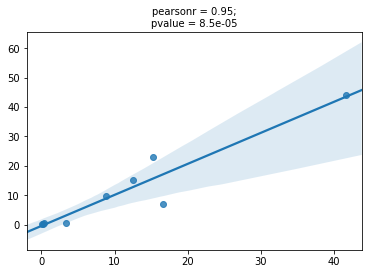

In [48]:
x = a[minerals].values[0]
y = b[minerals].values[0]

coeff, pvalue = stats.pearsonr(x, y)
print(u"Коэффициент корреляции Пирсона: {}".format(coeff))
print(u"p value: {}".format(pvalue))

regplot_perason(x, y)
plt.savefig('1.png')
pass

Видно, что точки около нуля, минералы с оклонулевым процентным содержанием, практичкски не участвуют в коэффициенте корреляции Пирсона (т.е. для оценки линейной зависимости), и тем самым смещают коэффциент Пирсона ближе к 1.

Например, если добавить "золото" , "серебро", то клэффициент задертся еще больше:

Коэффициент корреляции Пирсона: 0.963083187311
p value: 4.03908983171e-11


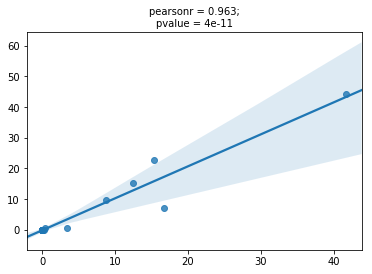

In [49]:
x = a[minerals].values[0]
y = b[minerals].values[0]

# добавление еще околонудевых данных
x = np.hstack([x, np.zeros(10)])
y = np.hstack([y, np.zeros(10)])

coeff, pvalue = stats.pearsonr(x, y)
print(u"Коэффициент корреляции Пирсона: {}".format(coeff))
print(u"p value: {}".format(pvalue))

ax = regplot_perason(x, y)
pass
plt.savefig('2.png')

А если убрать околонудевые значения, то уменьшится

Коэффициент корреляции Пирсона: 0.905884545151
p value: 0.0341662466626


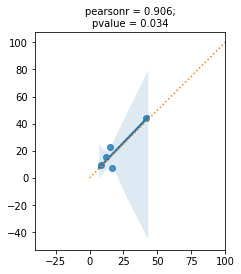

In [50]:
x = a[minerals].values[0]
y = b[minerals].values[0]

# остовляем только значения больше 1
indexer = (x>1) & (y>1)
x = x[indexer]
y = y[indexer]

coeff, pvalue = stats.pearsonr(x, y)
print(u"Коэффициент корреляции Пирсона: {}".format(coeff))
print(u"p value: {}".format(pvalue))

ax = regplot_perason(x, y)
ax.set_aspect(1)
ax.set_xlim(-40, 100)
ax.plot([0, 100], [0, 100],ls=':')

plt.savefig('3.png')
pass

(Синяя прямая на графике - линейная регресия данных, к Пирсону прямого отношение не имеет)

In [51]:
x

array([ 41.7 ,  15.33,  16.64,   8.78,  12.49])

In [52]:
y

array([ 44.2 ,  22.9 ,   7.03,   9.7 ,  15.2 ])

# Ответ BomBarDir

https://glav.su/forum/1/3216/messages/4747824/#message4747824